In [8]:
import re
import os
import time
import logging
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from datetime import datetime

# Global DataFrame to store log entries
log_df = pd.DataFrame(columns=['Timestamp', 'Level', 'Message'])

class DataFrameLoggingHandler(logging.Handler):
    def __init__(self, dataframe):
        super().__init__()
        self.dataframe = dataframe

    def emit(self, record):
        timestamp = pd.Timestamp.now()
        level = record.levelname
        # Use the actual log message from the record
        message = record.getMessage()  
        self.dataframe.loc[len(self.dataframe)] = [timestamp, level, message]

def setup_logging(log_file='app_log.log', log_level=logging.INFO):
    """
    Set up logging configuration to log to a file and console, and return a logger.
    
    Parameters:
    log_file (str): The name of the log file where logs will be saved.
    log_level (int): The log level (INFO, DEBUG, etc.).
    
    Returns:
    logger (logging.Logger): Configured logger.
    """
    # Remove any existing handlers attached to the root logger
    logging.root.handlers.clear()

    logger = logging.getLogger()
    logger.setLevel(log_level)

    # Define handlers
    handlers = [
        logging.FileHandler(log_file),
        logging.StreamHandler(),
        DataFrameLoggingHandler(log_df)
    ]
    
    for handler in handlers:
        handler.setLevel(log_level)
        handler.setFormatter(logging.Formatter('%(asctime)s - %(levelname)s - %(message)s'))
        logger.addHandler(handler)

    return logger

def log_imported_libraries(libraries, logger):
    """
    Log the imported libraries with their aliases.
    
    Parameters:
    libraries (dict): Dictionary of library names and their aliases.
    logger (logging.Logger): Logger to log the messages.
    """
    for lib, alias in libraries.items():
        logger.info(f"Importing '{lib}' as '{alias}'" if alias else f"Importing '{lib}' without alias")

# Set up the logger
logger = setup_logging(log_file='app_log.log', log_level=logging.INFO)

# Libraries and their aliases (None for libraries without an alias)
libraries_with_aliases = {
    'os': None,
    'time': None,
    're': 're',
    'pandas': 'pd',
    'numpy': 'np',
    'matplotlib.pyplot': 'plt',
    'seaborn': 'sns',
    'plotly.express': 'px',
    'plotly.graph_objects': 'go',
    'plotly.io': 'pio'
}

# Log the library imports
logger.info("Initializing logging configuration")
log_imported_libraries(libraries_with_aliases, logger)

print(log_df['Message'])

2024-09-21 18:39:07,382 - INFO - Initializing logging configuration
2024-09-21 18:39:07,390 - INFO - Importing 'os' without alias
2024-09-21 18:39:07,401 - INFO - Importing 'time' without alias
2024-09-21 18:39:07,408 - INFO - Importing 're' as 're'
2024-09-21 18:39:07,419 - INFO - Importing 'pandas' as 'pd'
2024-09-21 18:39:07,428 - INFO - Importing 'numpy' as 'np'
2024-09-21 18:39:07,438 - INFO - Importing 'matplotlib.pyplot' as 'plt'
2024-09-21 18:39:07,447 - INFO - Importing 'seaborn' as 'sns'
2024-09-21 18:39:07,457 - INFO - Importing 'plotly.express' as 'px'
2024-09-21 18:39:07,469 - INFO - Importing 'plotly.graph_objects' as 'go'
2024-09-21 18:39:07,482 - INFO - Importing 'plotly.io' as 'pio'


0           Initializing logging configuration
1                 Importing 'os' without alias
2               Importing 'time' without alias
3                       Importing 're' as 're'
4                   Importing 'pandas' as 'pd'
5                    Importing 'numpy' as 'np'
6       Importing 'matplotlib.pyplot' as 'plt'
7                 Importing 'seaborn' as 'sns'
8           Importing 'plotly.express' as 'px'
9     Importing 'plotly.graph_objects' as 'go'
10              Importing 'plotly.io' as 'pio'
Name: Message, dtype: object


In [16]:
def scan_directories(root_dir):
    data = []

    # Walk through the directory
    for dirpath, dirnames, filenames in os.walk(root_dir):
        for filename in filenames:
            file_path = os.path.join(dirpath, filename)
            file_stats = os.stat(file_path)
            
            # Collect file metadata
            file_size = file_stats.st_size  # File size in bytes
            creation_time = datetime.fromtimestamp(file_stats.st_ctime)  # File creation time
            modification_time = datetime.fromtimestamp(file_stats.st_mtime)  # Last modified time
            access_time = datetime.fromtimestamp(file_stats.st_atime)  # Last access time

            # Append metadata to the list
            data.append([dirpath, filename, file_path, file_size, creation_time, modification_time, access_time])

    # Convert to a pandas DataFrame with appropriate columns
    df = pd.DataFrame(data, columns=[
        'Directory', 'Filename', 'Full Path', 
        'File Size (Bytes)', 'Creation Time', 'Modification Time', 'Access Time'])
    
    return df

# Set the root directory to your project path
root_dir = '/home/tron/git/light_site'

# Get the DataFrame with metadata
meta_df = scan_directories(root_dir)

meta_df.head(10)


,Directory,Filename,Full Path,File Size (Bytes),Creation Time,Modification Time,Access Time
0,/home/tron/git/light_site,.env,/home/tron/git/light_site/.env,239,2024-09-21 00:21:41.665248,2024-09-21 00:21:41.665248,2024-09-21 00:21:41.795252
1,/home/tron/git/light_site,Pipfile.lock,/home/tron/git/light_site/Pipfile.lock,196788,2024-09-20 23:46:21.550593,2024-09-20 23:46:21.549593,2024-09-20 23:46:21.555593
2,/home/tron/git/light_site,Pipfile,/home/tron/git/light_site/Pipfile,775,2024-09-20 23:43:18.506745,2024-09-20 23:43:18.506745,2024-09-20 23:43:18.521737
3,/home/tron/git/light_site,structure_processed.pkl,/home/tron/git/light_site/structure_processed.pkl,2393012,2024-09-21 14:57:52.673820,2024-09-21 14:57:52.673820,2024-09-21 14:58:18.623008
4,/home/tron/git/light_site,package-lock.json,/home/tron/git/light_site/package-lock.json,88388,2024-09-15 11:09:13.627961,2024-09-11 12:19:51.437347,2024-09-16 09:38:05.473607
5,/home/tron/git/light_site,package.json,/home/tron/git/light_site/package.json,451,2024-09-15 11:09:13.629961,2024-09-11 11:08:32.634561,2024-09-21 00:27:38.294130
6,/home/tron/git/light_site,app_log.log,/home/tron/git/light_site/app_log.log,3518119,2024-09-21 18:07:07.504571,2024-09-21 18:07:07.504571,2024-09-19 01:30:39.510984
7,/home/tron/git/light_site,.env.swp,/home/tron/git/light_site/.env.swp,12288,2024-09-15 11:09:12.454967,2024-08-31 03:40:05.350710,2024-09-15 13:17:57.751385
8,/home/tron/git/light_site,manage.py,/home/tron/git/light_site/manage.py,666,2024-09-15 11:09:12.454967,2024-08-31 22:39:45.525605,2024-09-21 00:09:30.265023
9,/home/tron/git/light_site,requirements.txt,/home/tron/git/light_site/requirements.txt,672,2024-09-15 11:09:12.465967,2024-08-31 22:48:10.552679,2024-09-21 00:27:38.290131


### Create a Pandas dataFrame

In [9]:
 # Parameters provided from outside the function
file_path = 'project_structure.pkl'  # Example file path
date_col = None  # Set to a date column name if you have one
drop_na = True   # Whether to drop rows with NaN values
encoding = 'utf-8'  # Encoding format

def load_data(file_path, date_col=None, drop_na=True, encoding='utf-8'):
    """
    Load a dataset from a pickle file, with optional date parsing and NaN removal.

    Parameters:
    - file_path: str, path to the dataset
    - date_col: str, optional, column to parse as datetime
    - drop_na: bool, drop rows with NaN values (default: True)
    - encoding: str, file encoding type (default: 'utf-8')

    Returns:
    - pd.DataFrame: The loaded dataset or None if an error occurred
    """
    try:
        df = pd.read_pickle(file_path)
        logging.info(f"Dataset loaded successfully: {load_data}")

        if date_col:
            df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
            logging.info(f"Date column '{date_col}' parsed.")

        if drop_na:
            initial_rows = df.shape[0]
            df.dropna(inplace=True)
            removed_rows = initial_rows - df.shape[0]
            logging.info(f"Removed {removed_rows} rows with NaN values.")

        df.reset_index(drop=True, inplace=True)
        logging.info("Index reset.")

        return df

    except FileNotFoundError:
        logging.error(f"File not found: {file_path}")
    except pd.errors.EmptyDataError:
        logging.error(f"No data found in file: {file_path}")
    except Exception as e:
        logging.error(f"An error occurred: {e}")

# Applying the function with the provided variables
df = load_data(file_path=file_path, date_col=date_col, drop_na=drop_na, encoding=encoding)
if df is not None:
    logging.info(f"Number of rows and columns = {df.shape}")
    logging.info(f"Number of rows and columns = {df.dtypes}")

2024-09-21 18:39:11,274 - INFO - Dataset loaded successfully: <function load_data at 0x72a9811b30a0>
2024-09-21 18:39:11,290 - INFO - Removed 0 rows with NaN values.
2024-09-21 18:39:11,296 - INFO - Index reset.
2024-09-21 18:39:11,304 - INFO - Number of rows and columns = (8632, 5)
2024-09-21 18:39:11,313 - INFO - Number of rows and columns = directory_name    object
entity_name       object
relative_path     object
level              int64
type              object
dtype: object


In [3]:
def display_dataframe_html(df, rows=5, exclude_column='hover_template'):
    
    logging.info(f"Rendering an HTML preview: {display_dataframe_html}")
    
    # Exclude the specified column
    if exclude_column in df.columns:
        df = df.drop(columns=[exclude_column])

    # Select the first few rows
    df_sample = df.head(rows)

    # Return the DataFrame as an HTML table
    return df_sample.to_html(classes="table table-striped", index=False)

html_table = display_dataframe_html(df, rows=5)

2024-09-20 23:18:55,818 - INFO - Rendering an HTML preview: <function display_dataframe_html at 0x751b0de89990>


In [4]:
def categorize_by_extension(df):

    logging.info(f"Categorizing data by file extension: {categorize_by_extension}")
    """
    Extract and categorize file_extensions from the 'entity_name' column.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.

    Returns:
    pd.DataFrame: DataFrame with an additional 'file_extension' column.
    """
    df['file_extension'] = df['entity_name'].apply(lambda x: x.split('.')[-1] if '.' in x else 'No Extension')
    return df

df = categorize_by_extension(df)

2024-09-20 23:18:55,859 - INFO - Categorizing data by file extension: <function categorize_by_extension at 0x751b4d37cb80>


In [35]:
def check_file_location(row):
    """
    Check if a file's extension corresponds to its expected location in a Django project.

    Parameters:
    row (pd.Series): A row from the DataFrame containing 'relative_path' and 'file_extension'.

    Returns:
    bool: True if the file is in the expected location, otherwise False.
    """
    file_extension = row['file_extension'].lower()  # Convert to lowercase for consistency
    relative_path = row['relative_path'].lower()  # Convert to lowercase for consistency

    # Define file extensions and their expected locations
    static_extensions = ['css', 'js', 'png', 'jpg', 'jpeg', 'gif', 'svg', 'pdf', 'csv']
    html_extensions = ['html']
    markdown_extensions = ['md', 'rst']
    config_extensions = ['cfg', 'json', 'env', 'ini']
    notebook_extensions = ['ipynb']
    allowed_extensions = static_extensions + html_extensions + markdown_extensions + config_extensions + notebook_extensions

    # Check if file extension is one of the allowed types
    if file_extension in html_extensions and 'templates/' in relative_path:
        return True
    elif file_extension in static_extensions and 'static/' in relative_path:
        return True
    elif file_extension == 'py' and (
        'migrations/' in relative_path or 
        'management/commands/' in relative_path or 
        'apps/' in relative_path or
        'admin/' in relative_path):
        return True
    elif file_extension in config_extensions and (relative_path.startswith('.') or 'config/' in relative_path):
        return True
    elif file_extension in markdown_extensions and relative_path in ['README.md', 'LICENSE']:
        return True
    elif file_extension in notebook_extensions and ('notebooks/' in relative_path or relative_path.endswith('.ipynb')):
        return True
    elif file_extension not in allowed_extensions and 'static/' in relative_path:
        return True

    return False

def validate_app_structure(app_name, root_dir):
    """
    Validate the directory structure of a Django app.

    Parameters:
    app_name (str): The name of the Django app to validate.
    root_dir (str): The root directory of the Django project.

    Returns:
    bool: True if the app structure is valid, otherwise False.
    """
    app_path = os.path.join(root_dir, app_name)
    required_files = ['__init__.py', 'models.py', 'views.py', 'urls.py']
    required_directories = ['migrations']

    # Check if app directory exists
    if not os.path.isdir(app_path):
        logging.error(f"App directory '{app_path}' does not exist.")
        return False

    # Check for required files
    for file in required_files:
        if not os.path.isfile(os.path.join(app_path, file)):
            logging.error(f"Missing required file '{file}' in app '{app_name}'.")
            return False

    # Check for required directories
    for directory in required_directories:
        if not os.path.isdir(os.path.join(app_path, directory)):
            logging.error(f"Missing required directory '{directory}' in app '{app_name}'.")
            return False

    return True

logging.info(f"Validating app structure: {validate_app_structure}")
# Apply the function to each row of your DataFrame
df['expected_location'] = df.apply(check_file_location, axis=1)

# Validate app structure (or any other app name)
app_name = 'project_structure'
root_dir = '/home/tron/git/light_site'  # Update this path to your Django project root
is_valid_structure = validate_app_structure(app_name, root_dir)
logging.info(f"App '{app_name}' has a valid structure: {is_valid_structure}")

logging.info(f"Validating file location: {check_file_location}")

# To check counts
counts = df['expected_location'].value_counts()
logging.info(f"Counts of expected locations: {counts}")

2024-09-20 23:11:31,749 - INFO - Validating app structure: <function validate_app_structure at 0x74dcb9784f70>
2024-09-20 23:11:32,079 - INFO - App 'project_structure' has a valid structure: True
2024-09-20 23:11:32,088 - INFO - Validating file location: <function check_file_location at 0x74dc77b73d00>
2024-09-20 23:11:32,100 - INFO - Counts of expected locations: expected_location
False    8543
True       89
Name: count, dtype: int64


### Custom hover text function

In [36]:
def generate_custom_hover(row):
    return (
        f"Directory Name: {row.get('directory_name', 'N/A')}<br>"
        f"Entity Name: {row.get('entity_name', 'N/A')}<br>"
        f"Relative Path: {row.get('relative_path', 'N/A')}<br>"
        f"Directory Level: {row.get('directory_level_count', 'N/A')}<br>"
        f"Type: {row.get('type', 'N/A')}<br>"
    )

# Apply the function to generate hover text
#df['hover_template'] = df.apply(generate_custom_hover, axis=1)

logging.info(f"Hover template created: {generate_custom_hover}")

2024-09-20 23:11:33,122 - INFO - Hover template created: <function generate_custom_hover at 0x74dc77b73d90>


### Color discrete map

In [37]:
def create_color_map(df, category_column):
    """
    Create a color map for unique values in a specified column.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    category_column (str): The column name with categorical data.

    Returns:
    color_discrete_map (dict): A dictionary mapping unique categories to colors.
    """
    # Extract unique categories
    unique_values_list = df[category_column].unique().tolist()
    
    # Define a color map
    color_map = px.colors.sequential.Jet[:len(unique_values_list)]
    color_discrete_map = dict(zip(unique_values_list, color_map))
    
    return color_discrete_map

color_discrete_map = create_color_map(df, 'level')

logging.info(f"Color discrete map created: {create_color_map}.")

2024-09-20 23:11:33,492 - INFO - Color discrete map created: <function create_color_map at 0x74dc77b73eb0>.


### Function to create, update and save plots

In [38]:
def prepare_and_save_plot(fig, width=600, height=600, template='plotly_dark', 
                          plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)', 
                          font_family="Open Sans, sans-serif", font_size=10, font_color="white", 
                          hover_template=None,  # Changed to None by default
                          base_filename='plot', auto_open=False, counter=1, 
                          title=None, xaxis_title=None, yaxis_title=None,
                          legend_title=None, coloraxis_colorbar=None):
    """
    Parameters:
    fig (go.Figure): The Plotly figure to be updated.
    width (int): Width of the figure. Default is 600.
    height (int): Height of the figure. Default is 600.
    template (str): Plotly template for the figure. Default is 'plotly_dark'.
    plot_bgcolor (str): Background color of the plot area. Default is transparent.
    paper_bgcolor (str): Background color of the paper area. Default is transparent.
    font_family (str): Font family for the text. Default is 'Open Sans, sans-serif'.
    font_size (int): Font size for the text. Default is 10.
    font_color (str): Font color for the text. Default is 'white'.
    hover_template (str): Custom hover template for traces. Default is None.
    base_filename (str): Base name for the file. Default is 'plot'.
    auto_open (bool): Whether to open the file in the browser after saving. Default is False.
    counter (int): Counter for incrementing filenames. Default is 1.
    title (str): Title of the plot. Default is None.
    xaxis_title (str): Title for the x-axis. Default is None.
    yaxis_title (str): Title for the y-axis. Default is None.
    legend_title (str): Title for the legend. Default is None.
    """

    # Update layout
    fig.update_layout(
        width=width,
        height=height,
        template=template,
        plot_bgcolor=plot_bgcolor,
        paper_bgcolor=paper_bgcolor,
        font=dict(
            family=font_family,
            size=font_size,
            color=font_color
        ),
        title=title,
        xaxis_title=xaxis_title,
        yaxis_title=yaxis_title,
        legend_title=legend_title,
        coloraxis_colorbar=dict(
            title=coloraxis_colorbar
        ),
    )
    
    # Set custom hover template if provided
    if hover_template:
        fig.update_traces(hovertemplate=hover_template)
    
    # Generate filename with counter
    filename = f'{base_filename}_{counter}.html'
    
    # Save the figure to an HTML file
    pio.write_html(fig, file=filename, auto_open=auto_open)
    
    return fig

logging.info(f"Graph layout has been processed: {prepare_and_save_plot}.")

2024-09-20 23:11:33,849 - INFO - Graph layout has been processed: <function prepare_and_save_plot at 0x74dc79a7f370>.


### Function to create a level count graph

In [39]:
def create_level_count_graph(level_counts, x, y, color, title, template):
    level_count_fig = px.bar(
        level_counts,
        x=x,
        y=y,
        color=color,
        title=title
    )
    
    return level_count_fig

logging.info(f"Creating a level count graph: {create_level_count_graph}.")

2024-09-20 23:11:34,197 - INFO - Creating a level count graph: <function create_level_count_graph at 0x74dc787dc790>.


### Generating the plot

2024-09-20 23:11:34,784 - INFO - Level count graph generated: (level_count_fig | prepare_and_save_plot)


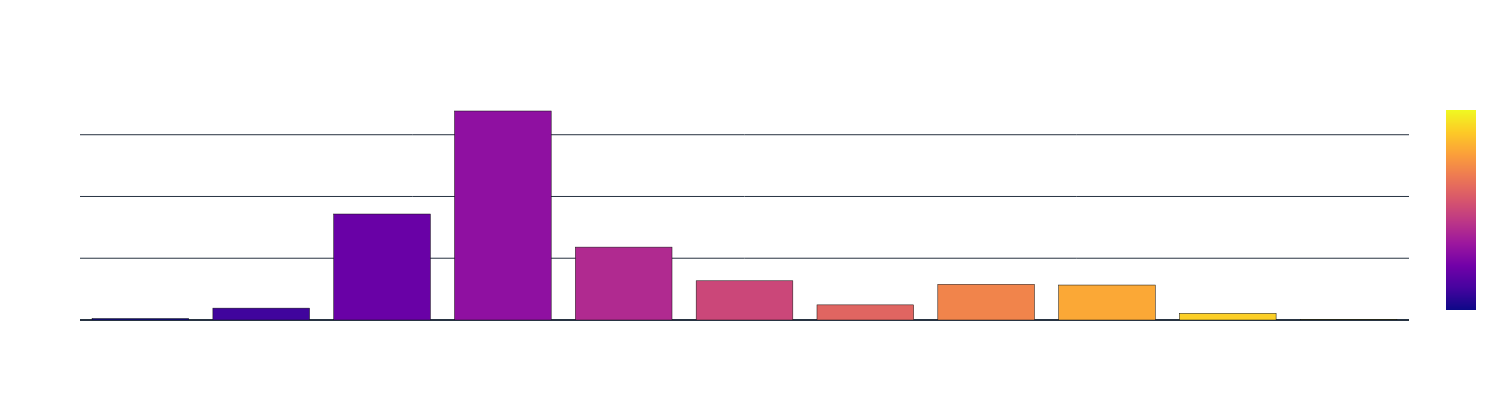

In [40]:
level_count_fig = create_level_count_graph(
    level_counts = df.groupby('level').size().reset_index(name='count'),
    x='level',
    y='count',
    color='level',
    title='File Count by Directory Level',
    template='plotly_dark'
)

logging.info("Level count graph generated: (level_count_fig | prepare_and_save_plot)")

# Prepare and save the plot
prepare_and_save_plot(
    level_count_fig,
    width=1200,
    height=400,
    #title="My Work Timeline",
    #xaxis_title="Start Date",
    #yaxis_title="Organizations",
    #coloraxis_colorbar='Tenure',
    #legend_title='Job Level',
    #base_filename='directory_level_distribution',
    #counter='1'
)

In [41]:
def plot_file_extension_distribution(df, min_count_threshold=6):
    logging.info("File extension distribution generated: (extension_count_fig | prepare_and_save_plot)")
    # Replace 'No Extension' with 'folders'
    df['file_extension'] = df['file_extension'].replace('No Extension', 'folders')
    
    # Count occurrences of each file_extension
    extension_counts = df['file_extension'].value_counts().reset_index()
    extension_counts.columns = ['file_extension', 'count']

    # Separate the counts into two groups: those with counts > 6 and those with counts <= 6
    other_counts = extension_counts[extension_counts['count'] <= 6]
    main_counts = extension_counts[extension_counts['count'] > 6]

    # Aggregate lesser counts into 'Other'
    if not other_counts.empty:
        other_sum = other_counts['count'].sum()
        other_row = pd.DataFrame({'file_extension': ['Other'], 'count': [other_sum]})
        final_counts = pd.concat([main_counts, other_row], ignore_index=True)
    else:
        final_counts = main_counts

    # Sort the final DataFrame by 'count' in descending order
    final_counts = final_counts.sort_values(by='count', ascending=False)

    # Create a bar chart
    extension_count_fig = px.bar(
        final_counts,
        x='file_extension',
        y='count',
        color='file_extension',
        title='Distribution of File Extensions',
        labels={'file_extension': 'File Extension', 'count': 'Count'},
    )
    return extension_count_fig

extension_count_fig =  plot_file_extension_distribution(df)
 
# Prepare and save the plot
prepare_and_save_plot(
    extension_count_fig,
    width=1200,
    height=400,
    #title="My Work Timeline",
    #xaxis_title="Start Date",
    #yaxis_title="Organizations",
    #coloraxis_colorbar='Tenure',
    #legend_title='Job Level',
    #base_filename='directory_level_distribution',
    #counter='1'
)

2024-09-20 23:11:35,024 - INFO - File extension distribution generated: (extension_count_fig | prepare_and_save_plot)


### Export the processed dataframe

In [42]:
def export_dataframe(df, pickle_file_path, csv_file_path):
    """
    Export a DataFrame to both a pickle file and a CSV file.

    Parameters:
    df (pd.DataFrame): The DataFrame to export.
    pickle_file_path (str): The file path where the pickle file will be saved.
    csv_file_path (str): The file path where the CSV file will be saved.
    """
    # Export to pickle file
    df.to_pickle(pickle_file_path)
    logging.info(f"DataFrame exported successfully: {pickle_file_path}")

    # Export to CSV file
    df.to_csv(csv_file_path, index=False)
    logging.info(f"DataFrame exported successfully: {csv_file_path}")


# Assume df is your DataFrame
pickle_path = 'structure_processed.pkl'
csv_path = 'structure_processed.csv'

export_dataframe(df, pickle_path, csv_path)

2024-09-20 23:11:35,716 - INFO - DataFrame exported successfully: structure_processed.pkl
2024-09-20 23:11:35,828 - INFO - DataFrame exported successfully: structure_processed.csv


In [43]:
def display_dataframe(df, rows=5, exclude_column='hover_template'):
    logging.info(f"Previewing the dataset: {display_dataframe}")
    if exclude_column in df.columns:
        df = df.drop(columns=exclude_column)
    return df.head(rows)

preview = display_dataframe(df, rows=10)
preview

2024-09-20 23:11:44,567 - INFO - Previewing the dataset: <function display_dataframe at 0x74dc77bdb7f0>


,directory_name,entity_name,relative_path,level,type,file_extension,expected_location
0,git,light_site,.,0,directory,folders,False
1,light_site,credentials.enc,credentials.enc,0,file,enc,False
2,light_site,data,data,0,directory,folders,False
3,data,app_log.log,data/app_log.log,1,file,log,False
4,data,.ipynb_checkpoints,data/.ipynb_checkpoints,1,directory,ipynb_checkpoints,False
5,.ipynb_checkpoints,generate_project_dataset-checkpoint.py,data/.ipynb_checkpoints/generate_project_datas...,2,file,py,False
6,.ipynb_checkpoints,package_manage-checkpoint.ipynb,data/.ipynb_checkpoints/package_manage-checkpo...,2,file,ipynb,True
7,.ipynb_checkpoints,project_structure-checkpoint.ipynb,data/.ipynb_checkpoints/project_structure-chec...,2,file,ipynb,True
8,.ipynb_checkpoints,project_structure-checkpoint.log,data/.ipynb_checkpoints/project_structure-chec...,2,file,log,False
9,data,output.html,data/output.html,1,file,html,False


In [44]:
logging.info(f"Log size: {log_df.shape}")
def display_log_df(log_df, rows=5, exclude_column=None):
    logging.info(f"Viewing the log: {display_dataframe}")
    if exclude_column in df.columns:
        log_df = log_df.drop(columns=exclude_column)
    return log_df.head(rows)

preview = display_log_df(log_df, rows=20)

2024-09-20 23:11:45,406 - INFO - Log size: (31, 3)
2024-09-20 23:11:45,417 - INFO - Viewing the log: <function display_dataframe at 0x74dc77bdb7f0>


In [45]:
df.dtypes

directory_name       object
entity_name          object
relative_path        object
level                 int64
type                 object
file_extension       object
expected_location      bool
dtype: object

In [46]:
# Define file categories based on extension
def categorize_file(extension):
    if extension == '.py' or extension == 'py':
        return 'Python Script'
    elif extension in ['.html', 'html']:
        return 'HTML Template'
    elif extension in ['.css', 'css', 'scss']:
        return 'Stylesheet'
    elif extension in ['.js', 'js']:
        return 'JavaScript'
    elif extension in ['.md', 'md']:
        return 'Markdown Document'
    elif extension in ['.ipynb', 'ipynb']:
        return 'Jupyter Notebook'
    elif extension in ['.log', 'log']:
        return 'Log File'
    elif extension == 'enc':
        return 'Encrypted File'
    elif extension == 'folders' or extension == 'ipynb_checkpoints':
        return 'Directory'
    else:
        return 'Other'

# Apply the categorization
df['file_category'] = df['file_extension'].apply(categorize_file)

2024-09-20 23:11:46,588 - INFO - File category distribution generated: (category_count_fig | prepare_and_save_plot)


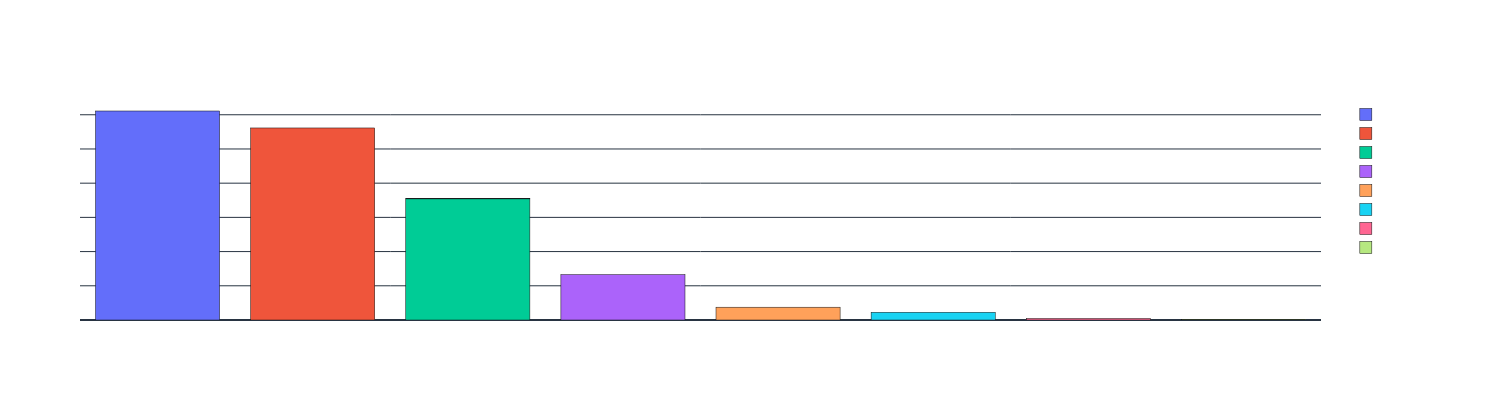

In [47]:
def plot_file_category_distribution(df, category_min_count_threshold=6):
    logging.info("File category distribution generated: (category_count_fig | prepare_and_save_plot)")
    
    # Count occurrences of each file_extension
    category_counts = df['file_category'].value_counts().reset_index()
    category_counts.columns = ['file_category', 'category_count']

    # Separate the counts into two groups: those with counts > 6 and those with counts <= 6
    category_other_counts = category_counts[category_counts['category_count'] <= 6]
    category_main_counts = category_counts[category_counts['category_count'] > 6]

    # Aggregate lesser counts into 'Other'
    if not category_other_counts.empty:
        category_other_sum = category_other_counts['category_count'].sum()
        category_other_row = pd.DataFrame({'file_category': ['Other'], 'category_count': [category_other_sum]})
        category_final_counts = pd.concat([category_main_counts, category_other_row], ignore_index=True)
    else:
        category_final_counts = category_main_counts

    # Sort the final DataFrame by 'count' in descending order
    category_final_counts = category_final_counts.sort_values(by='category_count', ascending=False)

    # Create a bar chart
    category_count_fig = px.bar(
        category_final_counts,
        x='file_category',
        y='category_count',
        color='file_category',
        title='Distribution of File Category',
        labels={'file_category': 'File Category', 'category_count': 'Count'},
    )
    return category_count_fig

category_count_fig =  plot_file_category_distribution(df)
 
# Prepare and save the plot
prepare_and_save_plot(
    category_count_fig,
    width=1200,
    height=400,
)

In [18]:
def determine_role(row):
    # Skip directories
    if row['type'] == 'directory':
        return 'Directory'
    
    extension = row['file_extension'].lower()
    path = row['relative_path']
    
    # Define role based on extension and path
    if extension in ['.py', 'py']:
        if 'models' in path:
            return 'Model'
        elif 'views' in path:
            return 'View'
        elif 'forms' in path:
            return 'Form'
        else:
            return 'Python Script'
    elif extension in ['.html', 'html']:
        return 'Template'
    elif extension in ['.css', 'css', '.js', 'js']:
        return 'Static File'
    elif extension in ['.md', 'md']:
        return 'Documentation'
    elif extension in ['.ipynb', 'ipynb']:
        return 'Jupyter Notebook'
    elif extension in ['.log', 'log']:
        return 'Log File'
    elif extension == 'enc':
        return 'Encrypted File'
    else:
        return 'Other'

# Apply the role determination
df['file_role'] = df.apply(determine_role, axis=1)

In [19]:
current_dir = os.getcwd()
base_dir = os.path.join(current_dir, '..')

def get_absolute_path(relative_path):
    return os.path.join(base_dir, relative_path.lstrip('./'))

def get_file_size(path):
    try:
        return Path(path).stat().st_size
    except FileNotFoundError:
        return None

def get_creation_date(path):
    try:
        return time.ctime(Path(path).stat().st_ctime)
    except FileNotFoundError:
        return None

def get_modification_date(path):
    try:
        return time.ctime(Path(path).stat().st_mtime)
    except FileNotFoundError:
        return None

# Apply the functions
df['absolute_path'] = df['relative_path'].apply(get_absolute_path)
df['file_size_bytes'] = df['absolute_path'].apply(get_file_size)
df['creation_date'] = df['absolute_path'].apply(get_creation_date)
df['modification_date'] = df['absolute_path'].apply(get_modification_date)

In [20]:
dir_size = df.groupby('directory_name')['file_size_bytes'].transform('sum')
df['size_percentage'] = (df['file_size_bytes'] / dir_size) * 100

In [21]:
file_type_freq = df['type'].value_counts().to_dict()
df['type_freq'] = df['type'].map(file_type_freq)

In [22]:
df['name_length'] = df['entity_name'].apply(len)

In [23]:
df['extension_length'] = df['file_extension'].apply(len)
df['extension_length'] = df['extension_length'].apply(lambda x: 0 if x == 7 else x)
df['is_project_root'] = df['directory_name'].apply(lambda x: 1 if x == 'light_site' else 0)
df['is_code_file'] = df['file_role'].apply(lambda x: 1 if x in ['Python Script', 'Template'] else 0)

In [24]:
df['size_group'] = pd.cut(
    df['file_size_bytes'],
    bins=[-1, 1024, 4096, 16384, 65536, 262144, 1048576, 5242880, 10485760, float('inf')],
    labels=['<1KB', '1KB-4KB', '4KB-16KB', '16KB-64KB', '64KB-256KB', '256KB-1MB', '1MB-5MB', '5MB-10MB', '>10MB'],
    include_lowest=True
)

In [25]:
def calculate_file_age(row):
    # Handle None values in creation_date and modification_date
    if pd.isna(row['creation_date']) or pd.isna(row['modification_date']):
        return None  # or some other default value, like -1 or np.nan
    
    # Convert the dates to datetime
    creation_date = pd.to_datetime(row['creation_date'], errors='coerce')
    modification_date = pd.to_datetime(row['modification_date'], errors='coerce')
    
    # Check if conversion was successful
    if pd.isna(creation_date) or pd.isna(modification_date):
        return None  # or some other default value
    
    # Calculate the difference in days
    return (modification_date - creation_date).days

# Apply the function to the DataFrame
df['file_age_days'] = df.apply(calculate_file_age, axis=1)

# Display the updated DataFrame
df.head()

,directory_name,entity_name,relative_path,level,type,file_extension,expected_location,file_category,file_role,absolute_path,...,creation_date,modification_date,size_percentage,type_freq,name_length,extension_length,is_project_root,is_code_file,size_group,file_age_days
0,git,light_site,.,0,directory,folders,False,Directory,Directory,/home/tron/git/light_site/data/../,...,Fri Sep 20 00:00:38 2024,Fri Sep 20 00:00:38 2024,100.000000,887,10,0,0,0,1KB-4KB,0.0
1,light_site,credentials.enc,credentials.enc,0,file,enc,False,Encrypted File,Encrypted File,/home/tron/git/light_site/data/../credentials.enc,...,None,None,NaN,7745,15,3,1,0,NaN,NaN
2,light_site,data,data,0,directory,folders,False,Directory,Directory,/home/tron/git/light_site/data/../data,...,Fri Sep 20 22:36:41 2024,Fri Sep 20 22:36:41 2024,0.876673,887,4,0,1,0,1KB-4KB,0.0
3,data,app_log.log,data/app_log.log,1,file,log,False,Log File,Log File,/home/tron/git/light_site/data/../data/app_log...,...,Fri Sep 20 22:36:59 2024,Fri Sep 20 22:36:59 2024,12.854072,7745,11,3,0,0,1MB-5MB,0.0
4,data,.ipynb_checkpoints,data/.ipynb_checkpoints,1,directory,ipynb_checkpoints,False,Directory,Directory,/home/tron/git/light_site/data/../data/.ipynb_...,...,Sun Sep 15 17:04:33 2024,Sun Sep 15 17:04:33 2024,0.026044,887,18,17,0,0,1KB-4KB,0.0


In [26]:
df['file_age_days'].nunique()

20

In [27]:
# Check unique values in creation_date and modification_date
unique_creation_dates = df['creation_date'].unique()
unique_modification_dates = df['modification_date'].unique()

#print("Unique Creation Dates:", unique_creation_dates)
#print("Unique Modification Dates:", unique_modification_dates)

# Check for records where dates are the same
same_date_records = df[df['creation_date'] == df['modification_date']]
print("Number of records with the same creation and modification date:", same_date_records.shape[0])

Number of records with the same creation and modification date: 45


In [28]:
# Filter records where creation_date and modification_date are the same
same_date_records = df[df['creation_date'] == df['modification_date']]

# Display the records with the same creation and modification date
print(same_date_records[['creation_date', 'modification_date']].head(10))

# Check if these records have additional attributes or patterns
print(same_date_records.describe())

               creation_date         modification_date
0   Fri Sep 20 00:00:38 2024  Fri Sep 20 00:00:38 2024
2   Fri Sep 20 22:36:41 2024  Fri Sep 20 22:36:41 2024
3   Fri Sep 20 22:36:59 2024  Fri Sep 20 22:36:59 2024
4   Sun Sep 15 17:04:33 2024  Sun Sep 15 17:04:33 2024
6   Sun Sep 15 15:58:57 2024  Sun Sep 15 15:58:57 2024
9   Sun Sep 15 17:20:40 2024  Sun Sep 15 17:20:40 2024
10  Fri Sep 20 22:37:00 2024  Fri Sep 20 22:37:00 2024
11  Fri Sep 20 22:36:41 2024  Fri Sep 20 22:36:41 2024
12  Sun Sep 15 21:10:24 2024  Sun Sep 15 21:10:24 2024
13  Sun Sep 15 21:10:24 2024  Sun Sep 15 21:10:24 2024
           level  file_size_bytes  size_percentage    type_freq  name_length  \
count  45.000000     4.500000e+01        45.000000    45.000000    45.000000   
mean    1.200000     3.583522e+05        12.902205  5916.200000    13.022222   
std     0.786245     1.208179e+06        23.377854  3066.990838     7.027507   
min     0.000000     5.460000e+02         0.006676   887.000000     3.00000

In [29]:
def plot_file_category_distribution(df, category_min_count_threshold=6):
    logging.info("File category distribution generated: (category_count_fig | prepare_and_save_plot)")
    
    # Count occurrences of each file_extension
    category_counts = df['file_category'].value_counts().reset_index()
    category_counts.columns = ['file_category', 'category_count']

    # Separate the counts into two groups: those with counts > 6 and those with counts <= 6
    category_other_counts = category_counts[category_counts['category_count'] <= 2]
    category_main_counts = category_counts[category_counts['category_count'] > 2]

    # Aggregate lesser counts into 'Other'
    if not category_other_counts.empty:
        category_other_sum = category_other_counts['category_count'].sum()
        category_other_row = pd.DataFrame({'file_category': ['Other'], 'category_count': [category_other_sum]})
        category_final_counts = pd.concat([category_main_counts, category_other_row], ignore_index=True)
    else:
        category_final_counts = category_main_counts

    # Sort the final DataFrame by 'count' in descending order
    category_final_counts = category_final_counts.sort_values(by='category_count', ascending=False)

    # Create a bar chart
    category_count_fig = px.bar(
        category_final_counts,
        x='file_category',
        y='category_count',
        color='file_category',
        title='Distribution of File Category',
        labels={'file_category': 'File Category', 'category_count': 'Count'},
    )
    return category_count_fig

category_count_fig =  plot_file_category_distribution(df)
 
# Prepare and save the plot
prepare_and_save_plot(
    category_count_fig,
    width=1200,
    height=400,
)

2024-09-20 22:37:22,110 - INFO - File category distribution generated: (category_count_fig | prepare_and_save_plot)


2024-09-20 22:37:22,512 - INFO - File category distribution generated: (category_count_fig | prepare_and_save_plot)


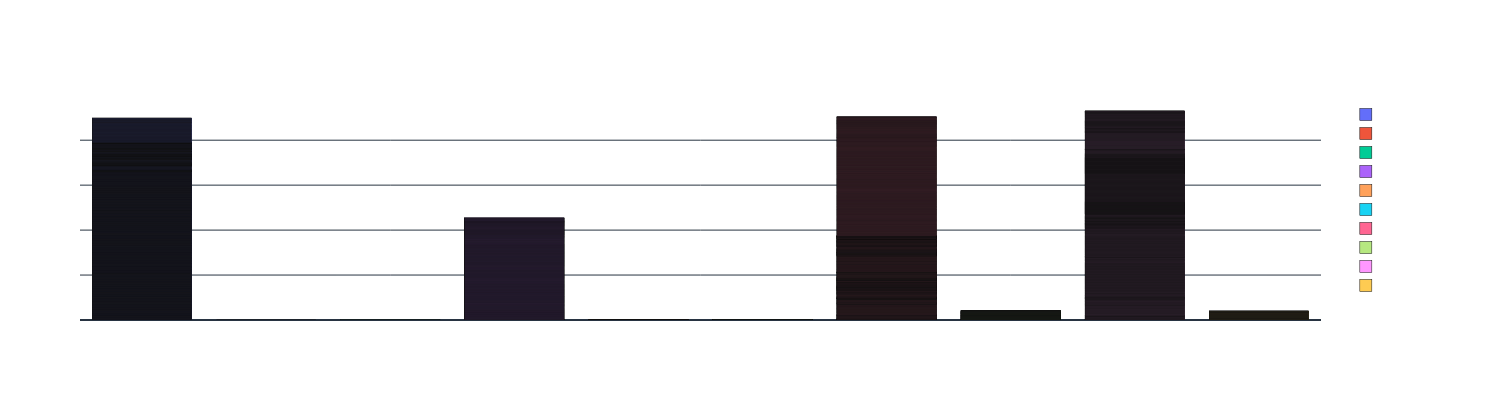

In [30]:
def plot_file_category_distribution(df, category_min_count_threshold=6):
    logging.info("File category distribution generated: (category_count_fig | prepare_and_save_plot)")

    # Create a scatter plot
    scatter_plot = px.bar(
        df,
        x='file_category',
        y='level',
        color='file_category',
        title='Distribution of File Category',
        labels={'file_category': 'File Category', 'category_count': 'Count'},
    )
    return scatter_plot

scatter_plot =  plot_file_category_distribution(df)
 
# Prepare and save the plot
prepare_and_save_plot(
    scatter_plot,
    width=1200,
    height=400,
)

2024-09-20 09:29:54,264 - INFO - File category distribution generated: (category_count_fig | prepare_and_save_plot)


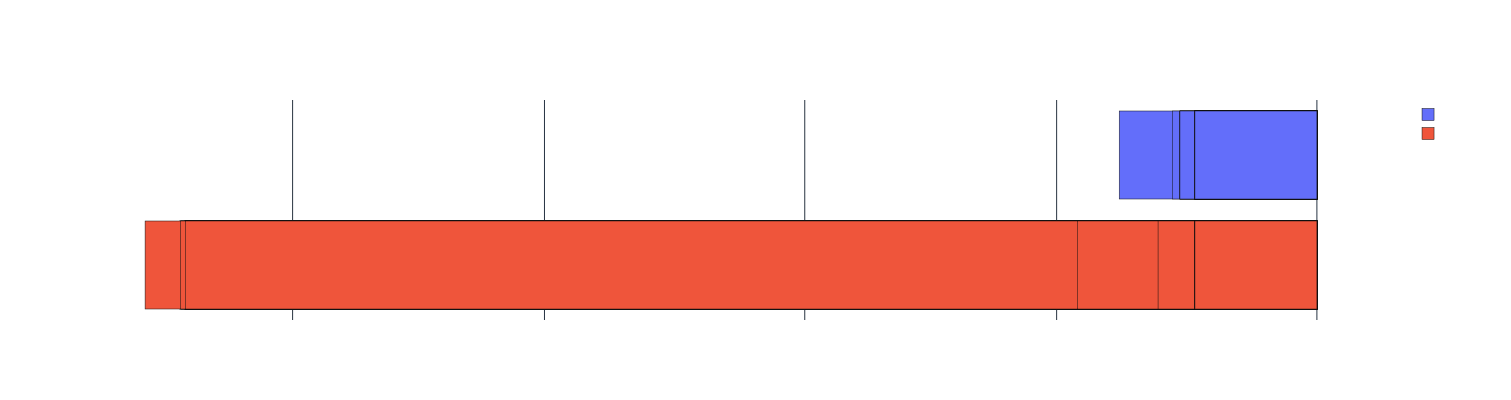

In [55]:
def plot_file_category_distribution(df, category_min_count_threshold=6):
    logging.info("File category distribution generated: (category_count_fig | prepare_and_save_plot)")

    # Create a scatter plot
    timeline_plot = px.timeline(
        df,
        x_start='creation_date',
        x_end='modification_date',
        y='type',
        color='type',
        title='File Age',
        #labels={'file_category': 'File Category', 'category_count': 'Count'},
    )
    return timeline_plot

timeline_plot =  plot_file_category_distribution(df)
 
# Prepare and save the plot
prepare_and_save_plot(
    timeline_plot,
    width=1200,
    height=400,
)

In [56]:
 df_cleaned = df[df['file_extension'] != 'node_modules']

# Optionally, you can reset the index if needed
df_cleaned = df_cleaned.reset_index(drop=True)